# Weatherapp

Forecast Days 14


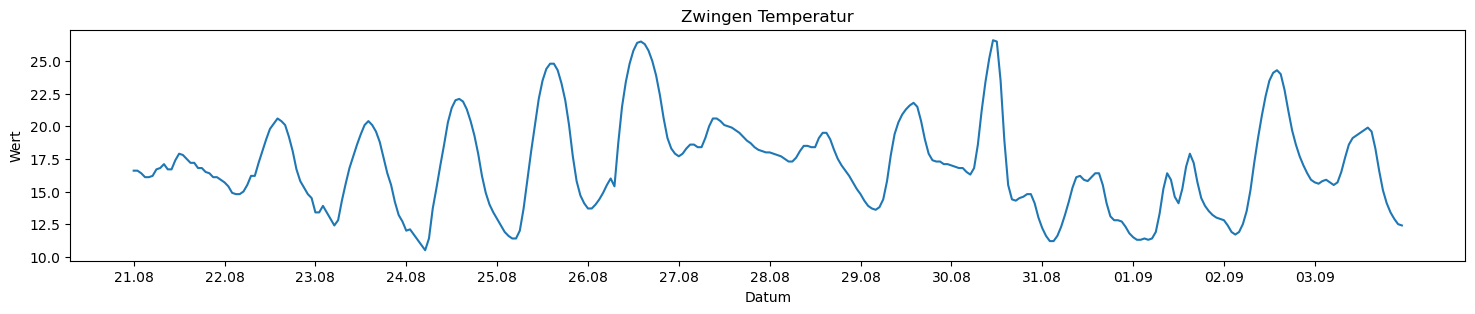

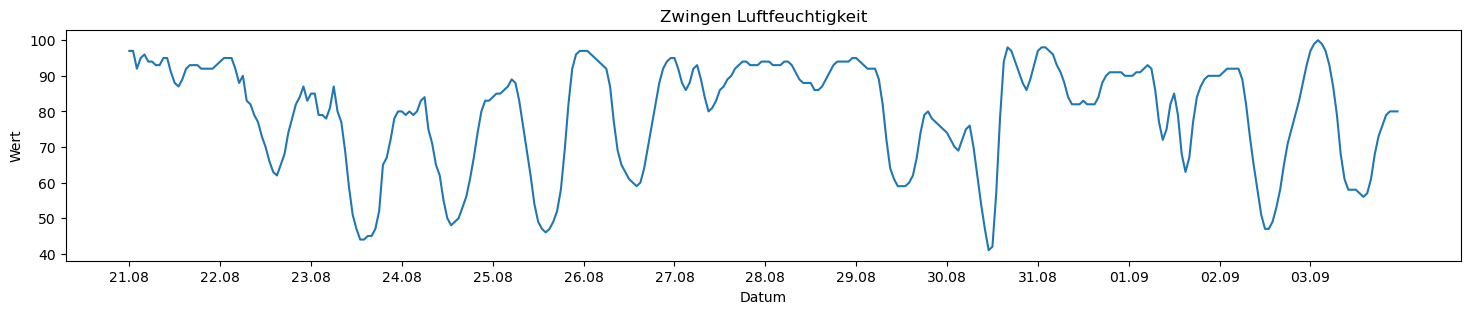

In [126]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prep Request
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 47.4382,
    "longitude": 7.5303,
    "hourly": "temperature_2m,relative_humidity_2m",
    "forecast_days": input("Forecast Days")
}

# Request & Receive
response = requests.get(url, params=params)
data = response.json()


# pandas data frame
temps = pd.DataFrame({
    "time": data["hourly"]["time"],
    "temperature": data["hourly"]["temperature_2m"],
    "humidity": data["hourly"]["relative_humidity_2m"]
})

temps["time"] = pd.to_datetime(temps["time"])
x = temps["time"].dt.strftime("%d.%m")

plt.figure(figsize=(18,3))
plt.plot(temps["time"].dt.strftime("%d.%m %H:%M"), temps["temperature"], label="Temperatur (°C)")
plt.xlabel("Datum")
plt.ylabel("Wert")
plt.title("Zwingen Temperatur")
plt.xticks(ticks=range(0, len(x), 24), labels=x[::24], rotation=0)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(temps["time"].dt.strftime("%d.%m %H:%M"), temps["humidity"], label="Luftfeuchtigkeit (°C)")
plt.xlabel("Datum")
plt.ylabel("Wert")
plt.title("Zwingen Luftfeuchtigkeit")
plt.xticks(ticks=range(0, len(x), 24), labels=x[::24], rotation=0)
plt.show()